In [1]:
import pandas as pd 
from scipy import stats
import numpy as np

#open dataset
df0 = pd.read_csv("20220105_company_emissions_data.csv", sep=',')

#drop irrelevant columns from dataset
df1 = df0.drop(columns=['WorkforceDataPoints.AsianMinoritiesEmployeesPercent',
                       'WorkforceDataPoints.AsianMinoritiesManagersPercent', 
                      'WorkforceDataPoints.AverageEmployeeLengthOfService',
                      'WorkforceDataPoints.AverageTrainingHours', 
                      'WorkforceDataPoints.BbbeeLevel', 
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.BlackOrAfricanAmericanMinoritiesManagersPercent',
                      'WorkforceDataPoints.ContractorAccidents',
                      'WorkforceDataPoints.ContractorFatalities',
                      'WorkforceDataPoints.ContractorLostWorkingDays',
                      'WorkforceDataPoints.DayCareServices',
                      'WorkforceDataPoints.DiversityAndOpportunityControversies',
                      'WorkforceDataPoints.EmployeeAccidents',
                      'WorkforceDataPoints.EmployeeFatalities',
                      'WorkforceDataPoints.EmployeeHealthAndSafetyTrainingHours',
                      'WorkforceDataPoints.EmployeeLostWorkingDays',
                      'WorkforceDataPoints.EmployeeResourceGroups',
                      'WorkforceDataPoints.EmployeeSatisfaction',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyControversies',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyOhsas18001',
                      'WorkforceDataPoints.EmployeesHealthAndSafetyTeam',
                      'WorkforceDataPoints.EmployeesWithDisabilities',
                      'WorkforceDataPoints.FlexibleWorkingHours',
                      'WorkforceDataPoints.GenderPayGapPercentage',
                      'WorkforceDataPoints.HealthAndSafetyTraining',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.HispanicOrLatinoMinoritiesManagersPercent',
                      'WorkforceDataPoints.HivAidsProgram',
                      'WorkforceDataPoints.HrcCorporateEqualityIndex',
                      'WorkforceDataPoints.HsmsCertifiedPercentage',
                      'WorkforceDataPoints.InternalPromotion',
                      'WorkforceDataPoints.InvoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateContractors',
                      'WorkforceDataPoints.LostTimeInjuryRateEmployees',
                      'WorkforceDataPoints.LostTimeInjuryRateTotal',
                      'WorkforceDataPoints.LostWorkingDays',
                      'WorkforceDataPoints.ManagementDepartures',
                      'WorkforceDataPoints.ManagementTraining',
                      'WorkforceDataPoints.MinoritiesEmployeesPercent',
                      'WorkforceDataPoints.MinoritiesManagersPercent',
                      'WorkforceDataPoints.MinoritiesSalaryGapPercent',
                      'WorkforceDataPoints.NewWomenEmployees',
                      'WorkforceDataPoints.NumberOfEmployeesFromCsrReporting',
                      'WorkforceDataPoints.OccupationalDiseases',
                      'WorkforceDataPoints.OtherMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.OtherMinoritiesManagersPercent',
                      'WorkforceDataPoints.PolicyCareerDevelopment',
                      'WorkforceDataPoints.PolicyDiversityAndOpportunity',
                      'WorkforceDataPoints.PolicyEmployeeHealthAndSafety',
                      'WorkforceDataPoints.PolicySkillsTraining',
                      'WorkforceDataPoints.PolicySupplyChainHealthAndSafety',
                      'WorkforceDataPoints.RecentDiversityOpportunityControversies',
                      'WorkforceDataPoints.RecentEmployeeHealthAndSafetyControversies',
                      'WorkforceDataPoints.RecentWagesWorkingConditionControversies',
                      'WorkforceDataPoints.SalariesAndWagesFromCsrReporting',
                      'WorkforceDataPoints.Strikes',
                      'WorkforceDataPoints.SupplierESGTraining',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyImprovements',
                      'WorkforceDataPoints.SupplyChainHealthAndSafetyTraining',
                      'WorkforceDataPoints.TargetsDiversityAndOpportunity',
                      'WorkforceDataPoints.TotalInjuryRateContractors',
                      'WorkforceDataPoints.TotalInjuryRateEmployees',
                      'WorkforceDataPoints.TotalInjuryRateTotal',
                      'WorkforceDataPoints.TradeUnionRepresentation',
                      'WorkforceDataPoints.TrainingCostsTotal',
                      'WorkforceDataPoints.TrainingHoursTotal',
                      'WorkforceDataPoints.TurnoverOfEmployees',
                      'WorkforceDataPoints.VoluntaryTurnoverOfEmployees',
                      'WorkforceDataPoints.WagesWorkingConditionControversiesCount',
                      'WorkforceDataPoints.WhiteMinoritiesEmployeesPercent',
                      'WorkforceDataPoints.WhiteMinoritiesManagersPercent',
                      'WorkforceDataPoints.WomenEmployees',
                      'WorkforceDataPoints.WomenManagers',
                      'WorkforceIndicators.AnnouncedLayOffsToTotalEmployees',
                      'WorkforceIndicators.HealthAndSafetyPolicy',
                      'WorkforceIndicators.InjuriesToMillionHours',
                      'WorkforceIndicators.LostDaysToTotalDays',
                      'WorkforceIndicators.NetEmploymentCreation',
                      'WorkforceIndicators.SalaryGap',
                      'WorkforceIndicators.TrainingAndDevelopmentPolicy',
                      'WorkforceIndicators.TrainingCostsPerEmployee',
                      'WorkforceIndicators.WagesWorkingConditionControversies'],
                      axis=1)
    
#number of columns in (cleaned) dataset
len(df0.columns)
len(df1.columns)

#df1.sort_values(['GTAP sector'], ascending=[True], inplace=True)
display(df1)

#save cleaned dataset as new file
df = df1.to_csv('company_emissions_cleaned.csv', index=True)

,organization_id,StatementDetails.FinancialPeriodEndDate,StatementDetails.FinancialPeriodFiscalYear,StatementDetails.FinancialPeriodIsIncomplete,StatementDetails.EsgOrAtdIndicator,EmissionDataPoints.AccidentalSpills,EmissionDataPoints.AnalyticCO2EstimationMethod,EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal,EmissionDataPoints.BiodiversityImpactReduction,EmissionDataPoints.CarbonOffsetsCredits,...,ResourceUseDataPoints.TargetsEnergyEfficiency,ResourceUseDataPoints.TargetsWaterEfficiency,ResourceUseDataPoints.TotalRenewableEnergy,ResourceUseDataPoints.ToxicChemicalsReduction,ResourceUseDataPoints.WaterRecycled,ResourceUseDataPoints.WaterWithdrawalTotal,WorkforceDataPoints.AccidentsTotal,WorkforceDataPoints.AnnouncedLayOffs,GTAP country,GTAP sector
0,2352,2006-12-31T00:00:00.000Z,2006,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Ireland,Null
1,10113,2018-12-31T00:00:00.000Z,2018,False,ESG,NaN,Median,285.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,United States of America,Null
2,6230,2011-12-31T00:00:00.000Z,2011,False,ESG,NaN,Reported,129206.0,1.0,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,United States of America,Forestry
3,6360,2012-12-31T00:00:00.000Z,2012,True,ATD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Transport nec
4,841,2006-12-31T00:00:00.000Z,2006,False,ESG,0.076,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,523000000.0,107.0,NaN,Canada,Electricity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101101,8473,2017-12-31T00:00:00.000Z,2017,True,ATD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Insurance
101102,2907,2010-03-31T00:00:00.000Z,2010,False,ESG,NaN,Reported,18764182.0,1.0,NaN,...,1.0,1.0,NaN,0.0,NaN,739071.0,NaN,NaN,Japan,Water transport
101103,12417,2014-12-31T00:00:00.000Z,2014,True,ATD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,Financial services nec
101104,479,2009-06-30T00:00:00.000Z,2009,False,ESG,NaN,Energy,1696964.0,0.0,NaN,...,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,Australia,Water


23911


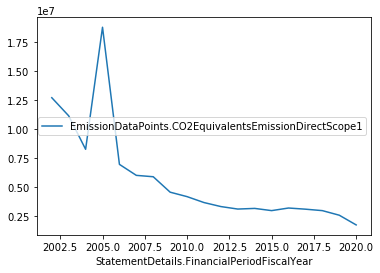

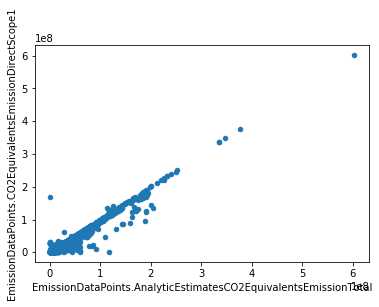

In [2]:
#drop rows with no data in either the year or target collumn
df2 = df1.dropna(subset=['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1', 'StatementDetails.FinancialPeriodFiscalYear'])
#df2 = df2[(np.abs(stats.zscore(df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])) < 3)]
#df2.loc[df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1']!=df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].max()]


#Make all data numeric
df2_numeric = df2.apply(pd.to_numeric, args=('coerce',))

#group data by year and calculate target mean for each year 
df2_grouped_by_year = df2_numeric.groupby('StatementDetails.FinancialPeriodFiscalYear').mean().apply(pd.to_numeric, args=('coerce',))

df2_grouped_by_year.reset_index().plot(x = 'StatementDetails.FinancialPeriodFiscalYear' ,y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')

df2_numeric.plot.scatter(x='EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal', y = 'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1')

df2['StatementDetails.FinancialPeriodFiscalYear'].value_counts()

print(df2['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'].argmax())

In [3]:
#Keep only numeric values for correlation calculations
df_full = df2.apply(pd.to_numeric, args=('coerce',))
df_full2 = df_full.select_dtypes(['number'])

#calculate correlations
cor = df_full2.corr()
cor_target = abs(cor['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])

#display Correlation values for features with a useable correlation
features = cor_target[cor_target > 0.5]
display(features)

EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal    0.981030
EmissionDataPoints.CO2EquivalentsEmissionDirectScope1              1.000000
EmissionDataPoints.CO2EquivalentsEmissionTotal                     0.985258
EmissionDataPoints.FlaringGases                                    0.641745
EmissionDataPoints.VocEmissions                                    0.579600
Name: EmissionDataPoints.CO2EquivalentsEmissionDirectScope1, dtype: float64

In [4]:
#Remove the rows with null as given sector and print amount of sectors, and businesses per sector
df2_rename = df2.rename(columns={"GTAP sector": "sector"})
df2_sector_clean = df2_rename[df2_rename.sector != "Null"]
print(df2_sector_clean['sector'].nunique())
print(df2_sector_clean['sector'].value_counts())

#calculate mean of target per sector and print all of them
df2_grouped_by_sector = df2_sector_clean.groupby('sector').mean().apply(pd.to_numeric, args=('coerce',))
print("Mean of target by sector")
print(df2_grouped_by_sector['EmissionDataPoints.CO2EquivalentsEmissionDirectScope1'])

51
Financial services nec                        2498
Computer, electronic and optical products     1568
Trade                                         1335
Electricity                                   1243
Real estate activities                        1037
Construction                                   932
Insurance                                      847
Communication                                  801
Chemical products                              787
Business services nec                          776
Other Extraction                               685
Basic pharmaceutical products                  667
Machinery and equipment nec                    564
Petroleum, coal products                       485
Bovine cattle, sheep and goats, horses         478
Gas                                            417
Transport nec                                  379
Motor vehicles and parts                       350
Fishing                                        343
Mineral products nec        

In [5]:
from sklearn import linear_model

#Hernoemt de columns omdat de '.' in de namen voor problemen zorgt
df1 = df1.rename(columns={'EmissionDataPoints.CO2EquivalentsEmissionDirectScope1': 'scope', 'StatementDetails.FinancialPeriodFiscalYear': "year"})


#hele lompe manier van rijen verwijderen in 2005 die heel raar doen
df1 = df1.drop(df1[(df1['year'] == 2005) & (df1['scope'] > 100000000)].index)

#Verwijdert de NaN's
df1 = df1.dropna(subset=['scope', 'year']) 

#sorteert per jaar en neemt dan de gemiddelde van elk jaar. Zodat je dan één lijn krijgt
df1_means = df1.groupby('year').mean().reset_index()

#maakt array van de column
y = df1_means.scope.values
x = df1_means.year.values

#iets van stack-overflow zodat de dimensies kloppen voor de lineaire regressie.
#Als iets niet helemaal klopt in de resultaten zou het hiermee te maken kunnen 
#hebben, want ik snap niet precies wat hier gebeurt
length = len(df1_means) 
x = x.reshape(length, 1)   
y = y.reshape(length, 1)

#stukkie sklearn
reg = linear_model.LinearRegression()
reg = reg.fit(x,y)

#richtingscoëfficiënt
reg.coef_


array([[-462955.05784842]])

In [6]:
import matplotlib.pyplot as plt

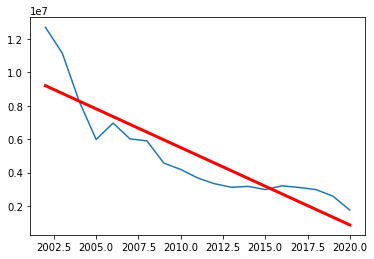

[-886807.66782755]


In [7]:
#plot de grafiek voor de lineaire regressie
plt.plot(x,y)
plt.plot(x, reg.predict(x), color='red', linewidth=3)
plt.show()


df1_means_indexed = df1.groupby('year').mean()

predicted = reg.predict(np.array(2020).reshape(-1, 1))[0]
actual = df1_means_indexed.scope[2020]
print(predicted- actual)

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [9]:
polyreg=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
polyreg.fit(x,y)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

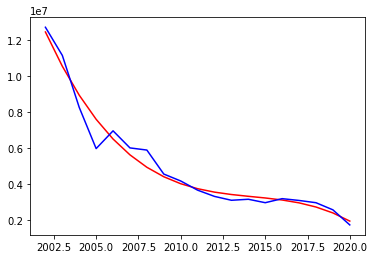

[[211567.38272529]]


In [10]:
plt.plot(x,polyreg.predict(x),color="red")
plt.plot(x,y,color='blue')
plt.show()

predicted_poly = polyreg.predict(np.array(2020).reshape(1, -1))
actual = df1_means_indexed.scope[2020]
print(predicted_poly - actual)

In [11]:
#find best degree of polynomial
#Dit moet werken zonder 2020 meengenomen in de data (dus een aparte training en test set)


years = df1['year'].unique()
years.sort()

def best_poly_fit(x_array, y_array, actual_df, years, max_K=50):
    cost_best = 1000000000000
    costs = []
    i_list = list(range(max_K))
    for i in range(max_K):
        polyreg_i = make_pipeline(PolynomialFeatures(i),linear_model.LinearRegression())
        polyreg_i.fit(x_array, y_array)
        
        cost = 0
        for j in years:
            actual = actual_df.scope[j]
            predicted_poly = polyreg_i.predict(np.array(j).reshape(1, -1))
            cost += abs(predicted_poly - actual)
            
        
        
        
        costs.append(cost[0][0])
        #if(cost < cost_best):
            #cost_best = cost         
            #K_best = i
    
            
    return i_list, costs 

In [12]:
print(best_poly_fit(x, y, df1_means_indexed, years))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], [43434280.94611615, 21151780.54658247, 10540935.523702752, 7143105.1093287915, 7141599.9862819165, 7137976.73384051, 7134316.265822932, 7130618.368972346, 7126883.140456721, 7123110.220534846, 7119299.652175471, 7115451.292800471, 7111564.915847346, 7107640.41882281, 7103677.75866656, 7099676.736205623, 7095637.334815547, 7091559.459815547, 7087442.662940547, 7083287.096534297, 7079092.741076991, 7074859.335803553, 7070586.626819178, 7066274.767444178, 7061923.574573085, 7057532.691754863, 7053102.365094706, 7048632.332868144, 7044122.353375956, 7039572.463239238, 7034982.494489238, 7030352.455915019, 7025682.038922831, 7020971.254743144, 7016220.037946269, 7011428.251325175, 7006595.653668925, 7001722.3314033, 6996808.0579658, 6991852.821149394, 6986856.531111762, 6981818.851912543, 6976739.9730

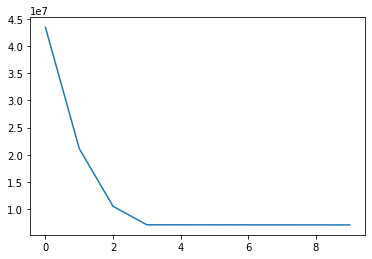

In [13]:
x2, y2 = best_poly_fit(x, y, df1_means_indexed, years, 10)
plt.plot(x2, y2)

#Dus beste polynomial is 3.

In [14]:
df1_sector = df1.rename(columns={"GTAP sector": "sector"})

#Function that can fit a polynomial prediction function over a certain sector given in the first argument
def sector_fit(sector, k):
    
    df_sector_only = df1_sector[df1_sector.sector == sector]
    df_sector_only.sort_values(['year'], ascending=[True], inplace=True)
    df_sector_means = df_sector_only.groupby('year').mean().reset_index()
    
    y_mean = df_sector_means.scope.values
    x_mean = df_sector_means.year.values
    
    y1 = df_sector_only.scope.values
    x1 = df_sector_only.year.values
    
    length = len(df_sector_only) 
    x1 = x1.reshape(length, 1)   
    y1 = y1.reshape(length, 1)
    
    polyreg=make_pipeline(PolynomialFeatures(k),linear_model.LinearRegression())
    polyreg.fit(x1,y1)
    
    plt.plot(x1,polyreg.predict(x1),color="red")
    plt.plot(x_mean,y_mean,color='blue')
    plt.show()
    
df1_sector['sector'].unique()
    

array(['Forestry', 'Construction', 'Null', 'Oil', 'Gas', 'Communication',
       'Manufactures nec', 'Beverages and tobacco products', 'Trade',
       'Motor vehicles and parts', 'Electricity', 'Fishing',
       'Water transport', 'Computer, electronic and optical products',
       'Financial services nec', 'Chemical products',
       'Warehousing and support activities', 'Metal products',
       'Insurance', 'Other Extraction', 'Water', 'None',
       'Basic pharmaceutical products', 'Sugar cane, sugar beet',
       'Real estate activities', 'Textiles', 'Electrical equipment',
       'Transport nec', 'Recreational and other services',
       'Accommodation, Food and service activities',
       'Business services nec', 'Animal products nec',
       'Vegetables, fruit, nuts', 'Machinery and equipment nec',
       'Rubber and plastic products', 'Education',
       'Petroleum, coal products', 'Food products nec',
       'Transport equipment nec', 'Mineral products nec',
       'Bovine cat

<ipython-input-14-ff247f1db5b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sector_only.sort_values(['year'], ascending=[True], inplace=True)


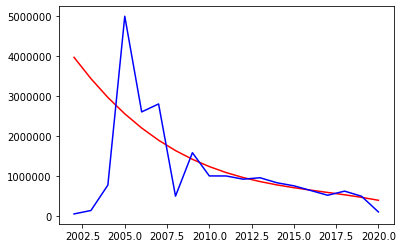

In [15]:
# fits a polynomial
sector_fit('Construction',3)

<ipython-input-16-4765887c46ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data.sort_values(['year'], ascending=[True], inplace=True)


,organization_id,StatementDetails.FinancialPeriodEndDate,year,StatementDetails.FinancialPeriodIsIncomplete,StatementDetails.EsgOrAtdIndicator,EmissionDataPoints.AccidentalSpills,EmissionDataPoints.AnalyticCO2EstimationMethod,EmissionDataPoints.AnalyticEstimatesCO2EquivalentsEmissionTotal,EmissionDataPoints.BiodiversityImpactReduction,EmissionDataPoints.CarbonOffsetsCredits,...,ResourceUseDataPoints.TargetsEnergyEfficiency,ResourceUseDataPoints.TargetsWaterEfficiency,ResourceUseDataPoints.TotalRenewableEnergy,ResourceUseDataPoints.ToxicChemicalsReduction,ResourceUseDataPoints.WaterRecycled,ResourceUseDataPoints.WaterWithdrawalTotal,WorkforceDataPoints.AccidentsTotal,WorkforceDataPoints.AnnouncedLayOffs,GTAP country,GTAP sector
3883,6589,2002-12-31T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,4.618202e+07,NaN,1860.0,United States of America,Chemical products
18656,4441,2002-03-30T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,1.0,NaN,...,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,United Kingdom,Trade
85968,1891,2002-12-31T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,7.750000e+06,NaN,2200.0,Germany,Chemical products
27836,746,2002-12-31T00:00:00.000Z,2002,False,ESG,14.681,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Canada,Transport nec
48755,5879,2002-12-31T00:00:00.000Z,2002,False,ESG,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,1.0,NaN,1.283400e+07,NaN,75.0,United States of America,Basic pharmaceutical products
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3652,9235,2019-12-31T00:00:00.000Z,2019,False,ESG,NaN,Reported,188613.0,1.0,NaN,...,1.0,1.0,27000.0,0.0,NaN,6.294512e+06,NaN,NaN,United States of America,"Accommodation, Food and service activities"
49672,1052,2019-10-31T00:00:00.000Z,2019,False,ESG,NaN,Reported,5231.0,0.0,NaN,...,1.0,0.0,NaN,0.0,NaN,NaN,62.0,NaN,Canada,Financial services nec
68104,3251,2019-12-31T00:00:00.000Z,2019,False,ESG,0.000,Reported,540162.0,0.0,NaN,...,0.0,0.0,62190.0,0.0,NaN,1.150100e+07,NaN,NaN,Netherlands,"Vegetables, fruit, nuts"
68064,13890,2019-12-31T00:00:00.000Z,2019,False,ESG,0.000,Reported,1495567.0,1.0,NaN,...,0.0,0.0,NaN,0.0,NaN,1.325640e+03,NaN,NaN,United States of America,Transport nec


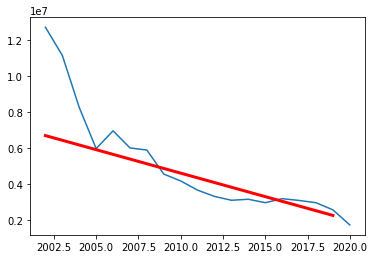

In [16]:
#gebruik alle data punten ipv mean
training_data = df1[df1.year != 2020]
training_data.sort_values(['year'], ascending=[True], inplace=True)
test_data = df1[df1.year == 2020]

display(training_data)

y1 = training_data.scope.values
x1 = training_data.year.values

length = len(training_data) 
x1 = x1.reshape(length, 1)   
y1 = y1.reshape(length, 1)

reg = linear_model.LinearRegression()
reg = reg.fit(x1,y1)

plt.plot(x,y)
plt.plot(x1, reg.predict(x1), color='red', linewidth=3)
plt.show()



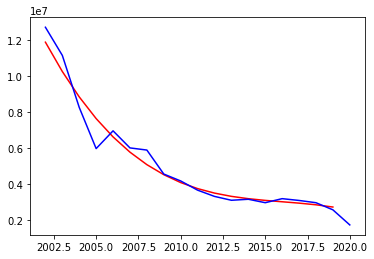

In [17]:
#polynomial regression met alle datapunten doet dit???
polyreg=make_pipeline(PolynomialFeatures(3),linear_model.LinearRegression())
polyreg.fit(x1,y1)

plt.plot(x1,polyreg.predict(x1),color="red")
plt.plot(x,y,color='blue')
plt.show()


In [38]:
df1_organization = df1.rename(columns={"organization_id": "id"})

#Function that can fit a polynomial prediction function over a certain organization given in the first argument
def organization_fit(id, k):
    
    df_id_only = df1_organization[df1_organization.id == id]
    df_sorted1 = df_id_only.sort_values(['year'], ascending=[True], inplace=False)
    
    y1 = df_sorted1.scope.values
    x1 = df_sorted1.year.values
    
    length = len(df_id_only) 
    x1 = x1.reshape(length, 1)   
    y1 = y1.reshape(length, 1)
    
    polyreg=make_pipeline(PolynomialFeatures(k),linear_model.LinearRegression())
    polyreg.fit(x1,y1)
    
    plt.plot(x1,polyreg.predict(x1),color="red")
    plt.plot(x1,y1,color='blue')
    plt.show()
    

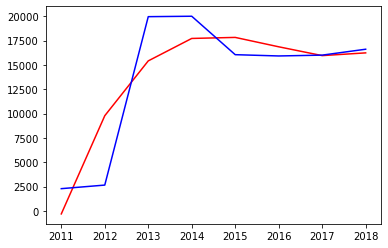

In [39]:
organization_fit(5,3)

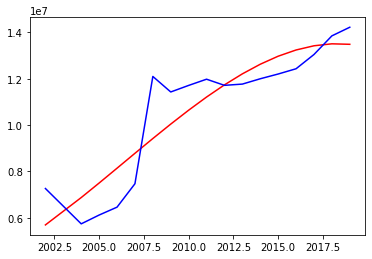

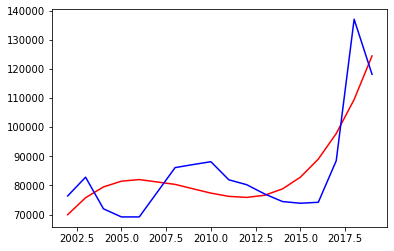

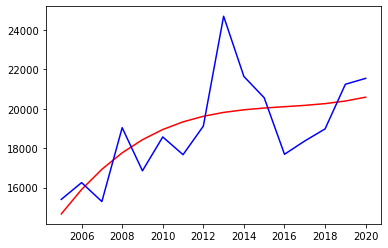

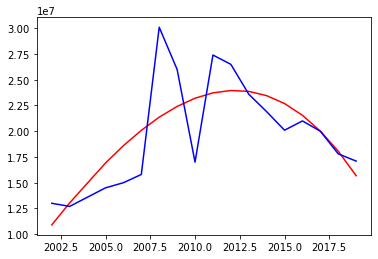

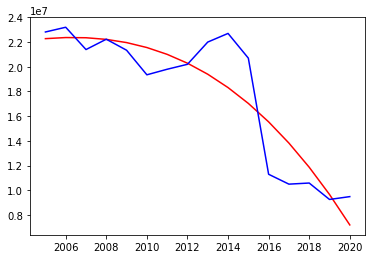

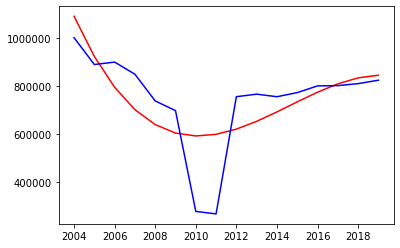

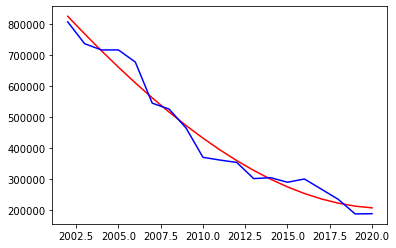

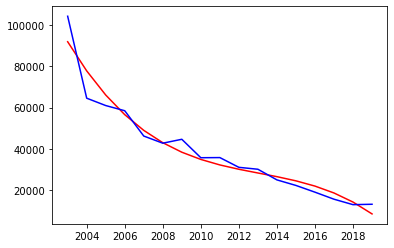

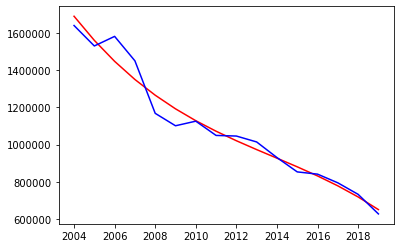

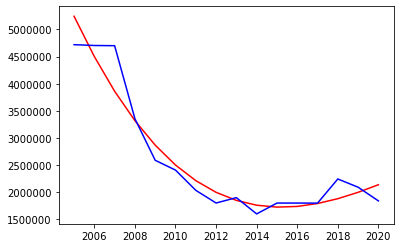

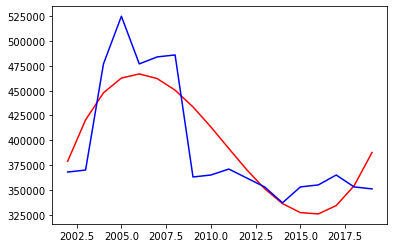

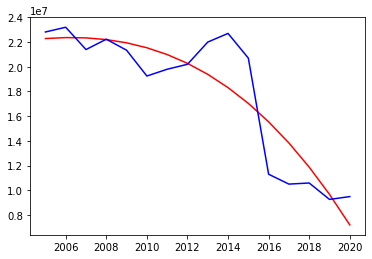

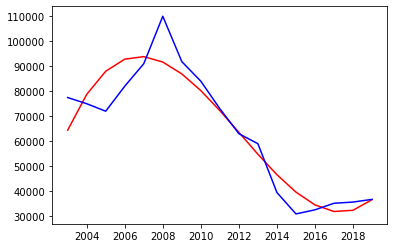

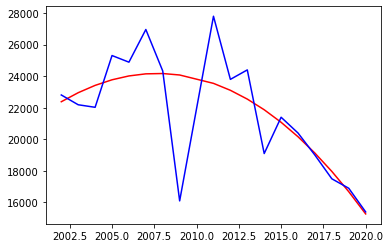

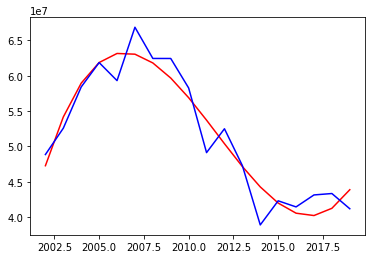

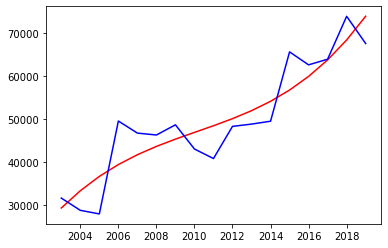

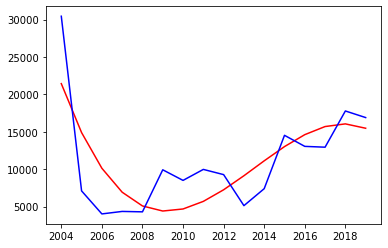

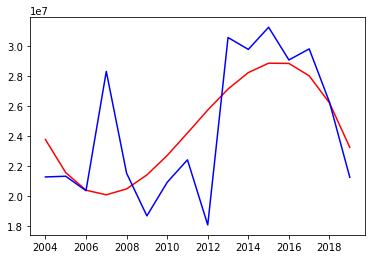

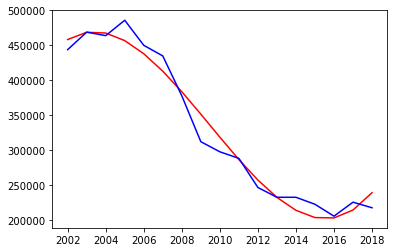

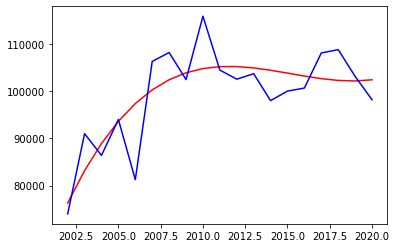

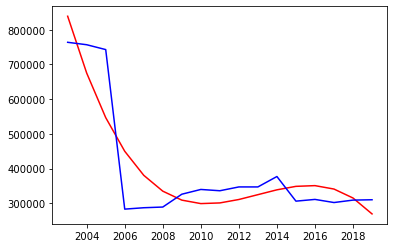

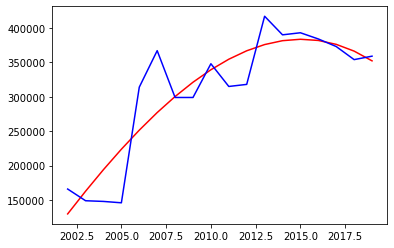

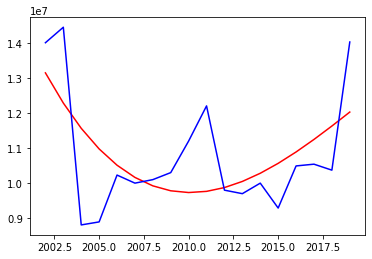

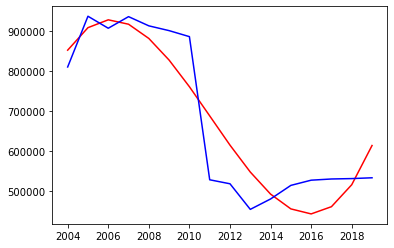

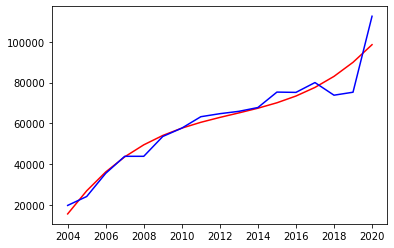

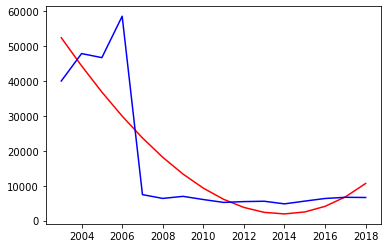

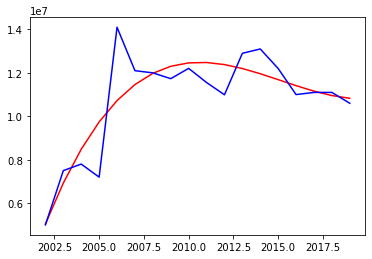

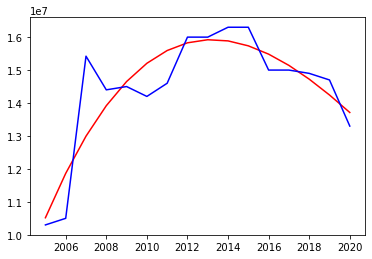

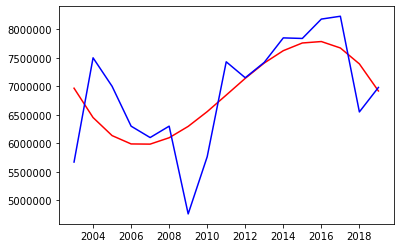

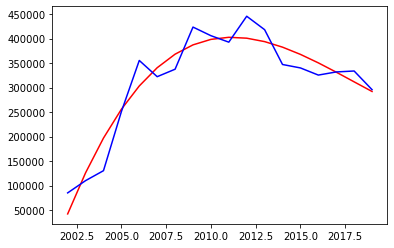

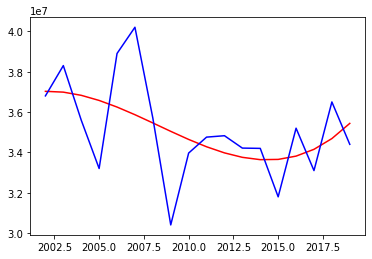

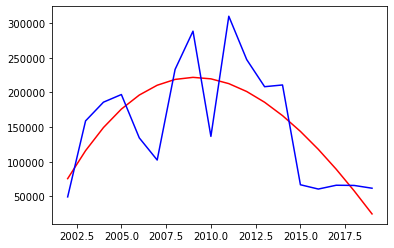

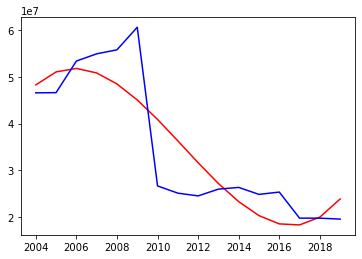

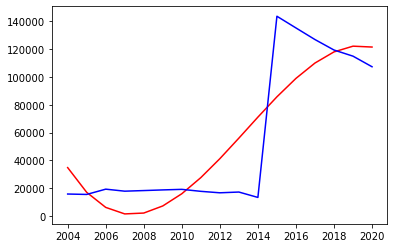

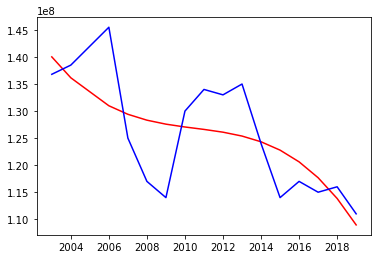

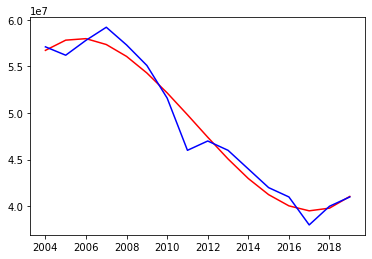

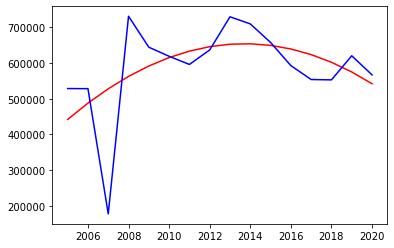

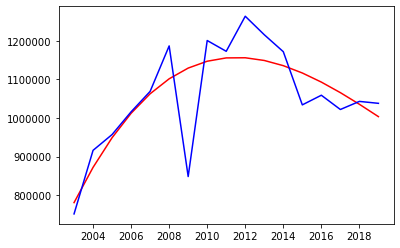

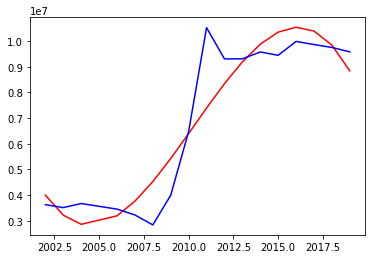

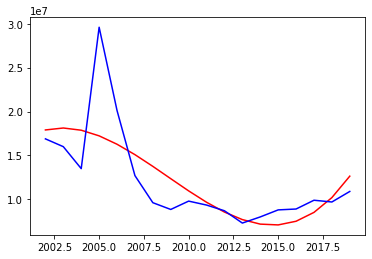

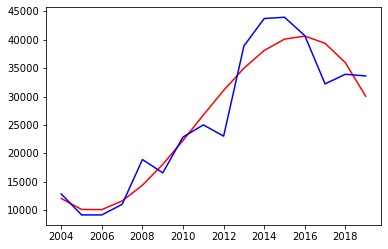

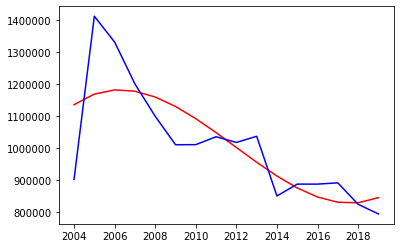

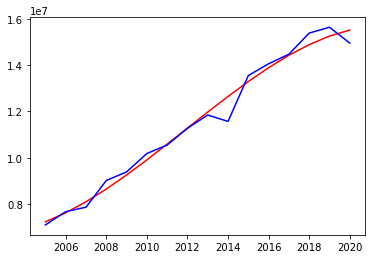

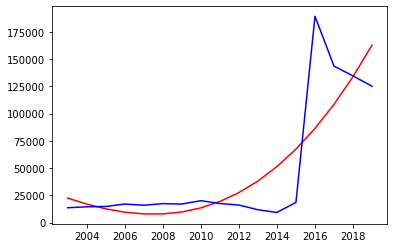

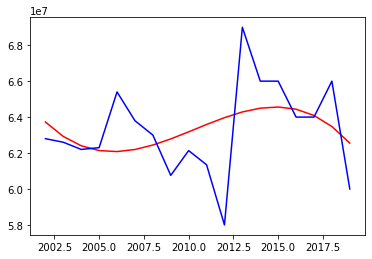

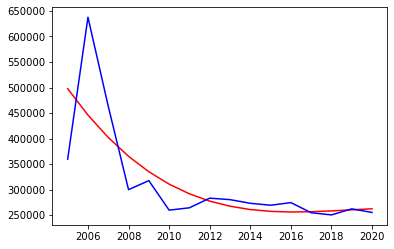

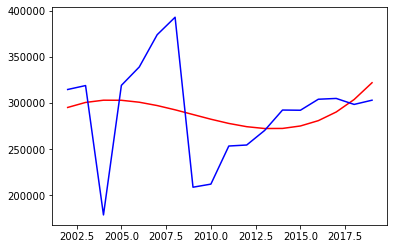

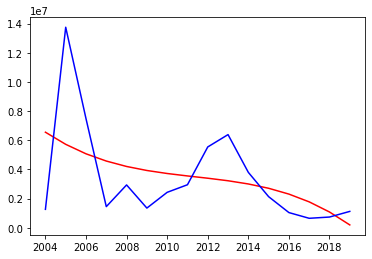

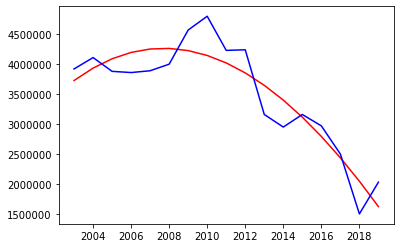

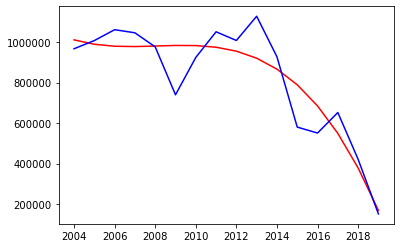

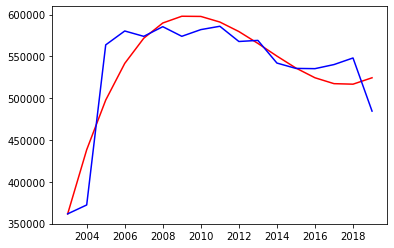

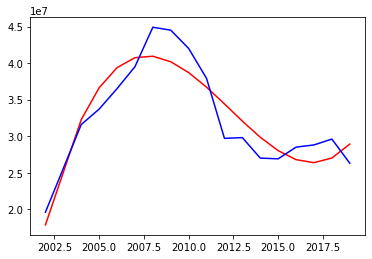

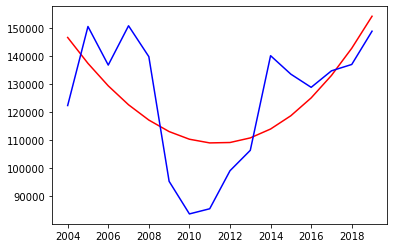

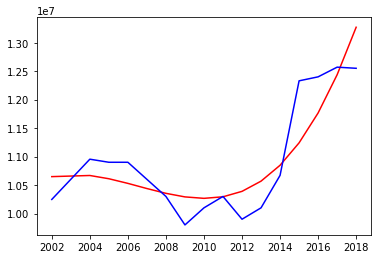

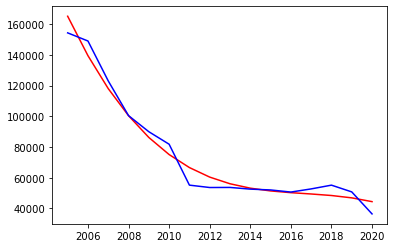

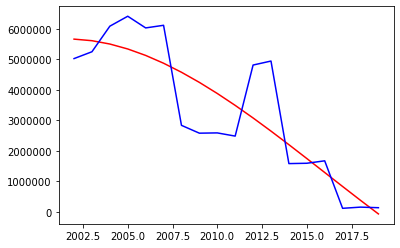

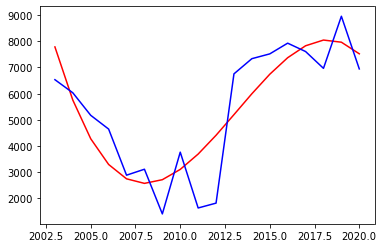

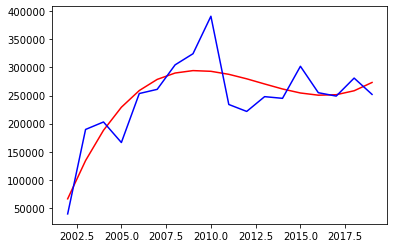

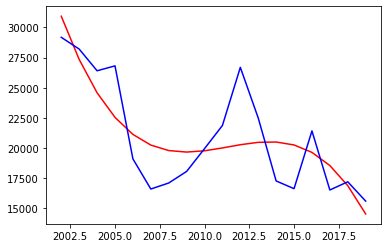

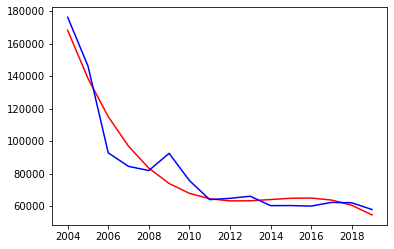

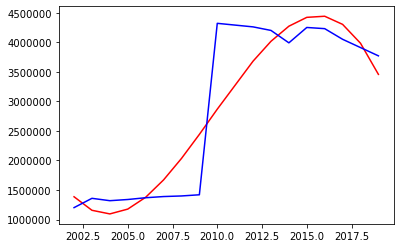

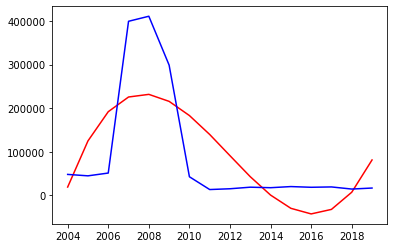

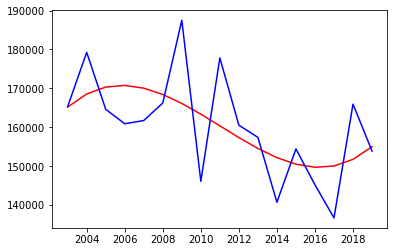

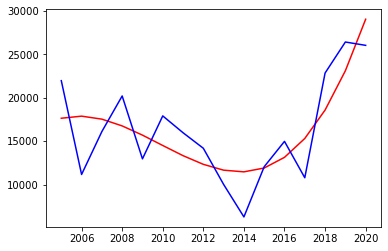

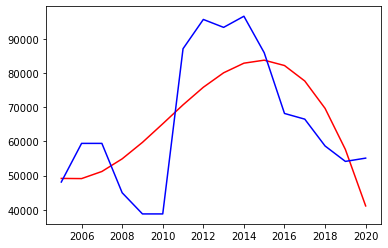

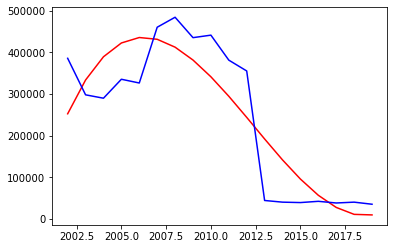

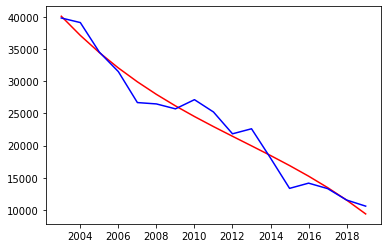

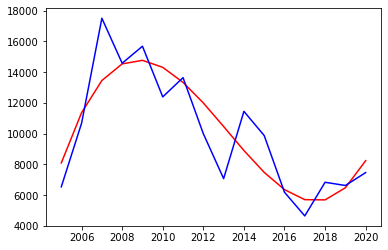

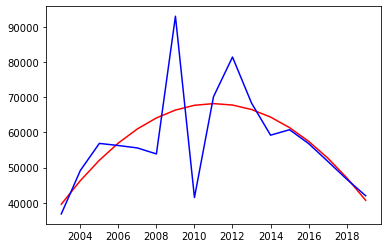

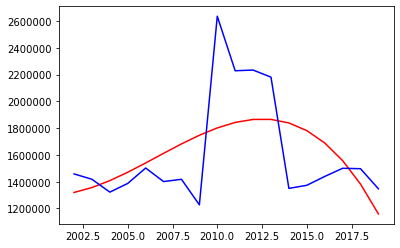

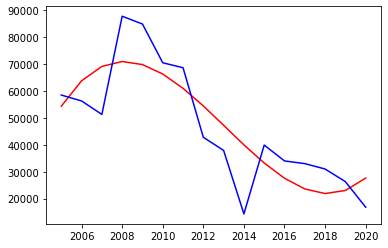

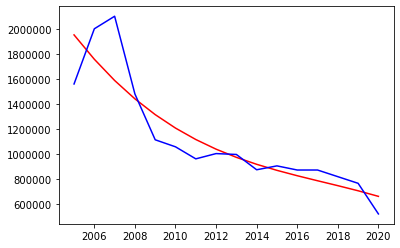

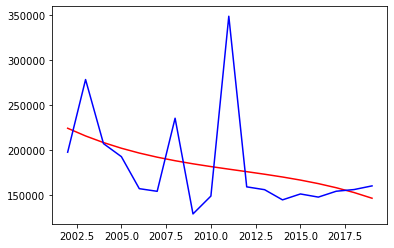

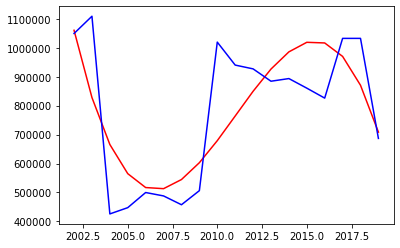

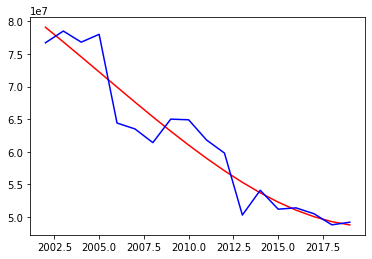

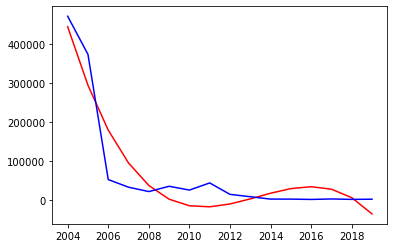

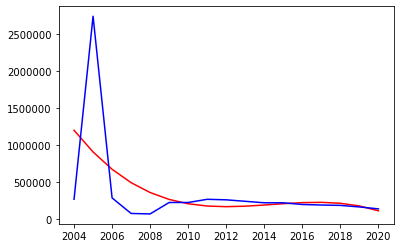

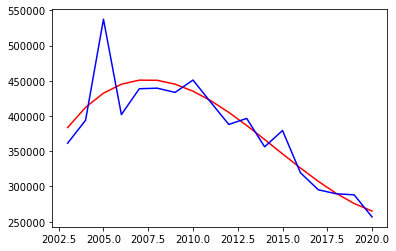

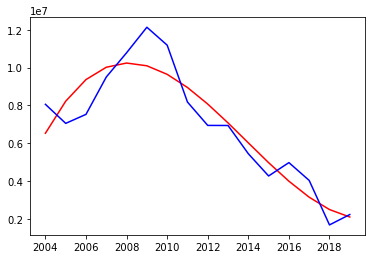

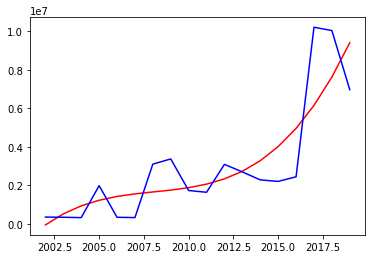

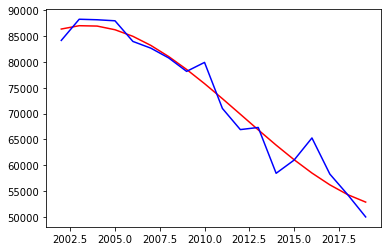

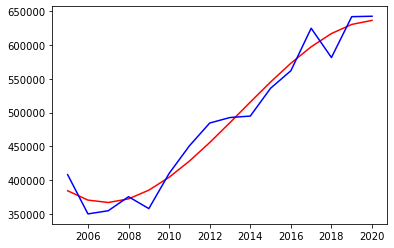

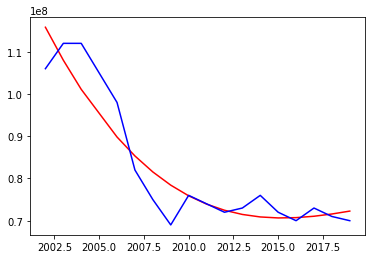

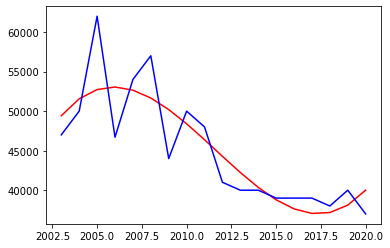

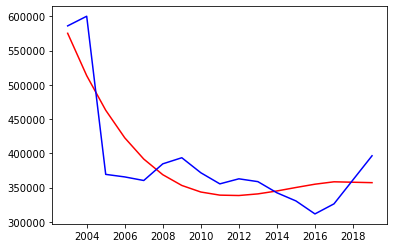

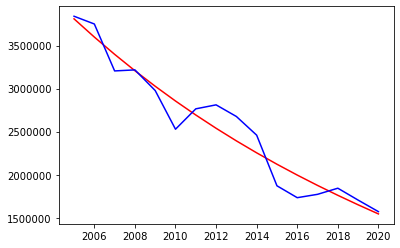

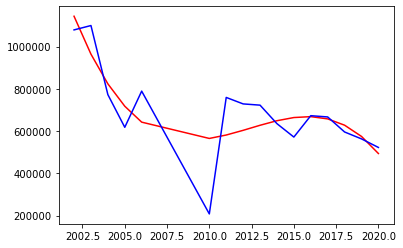

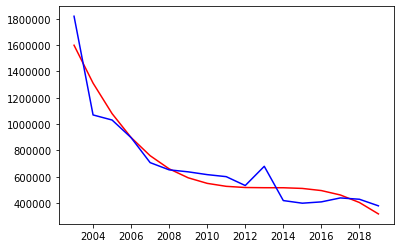

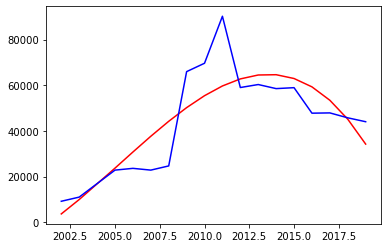

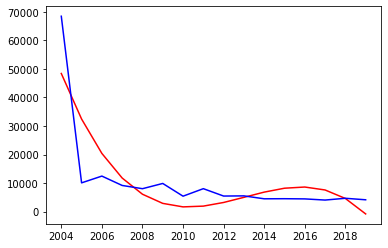

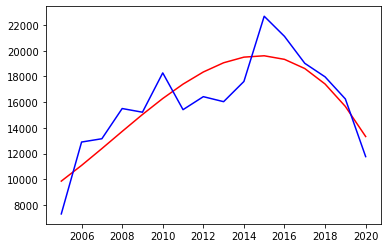

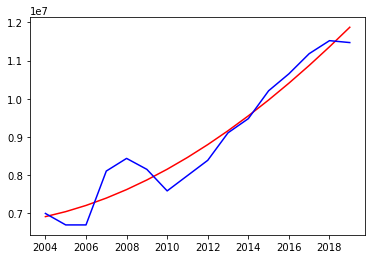

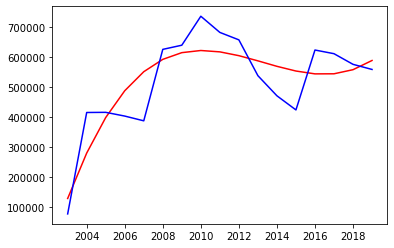

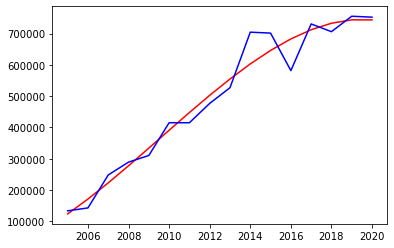

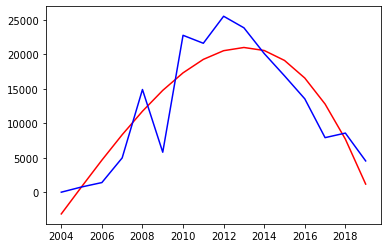

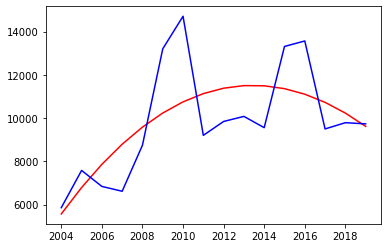

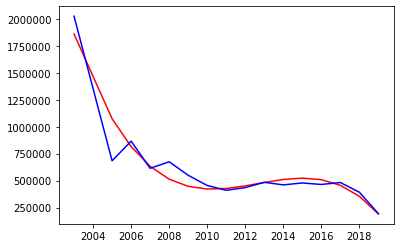

In [40]:
ids = df1_organization['id'].unique()
ids_good = []


for id in ids:
    df_id_only = df1_organization[df1_organization.id == id]
    if len(df_id_only['year'].unique()) > 15:
        ids_good.append(id)
        

for id in ids_good:
    organization_fit(id, 5)